# Importing and merging data

In [3]:
import pandas as pd

In [4]:
df1 = pd.read_csv(r"C:\Users\shriy\OneDrive\Desktop\infosys\ProductA.csv")
df1

,Day Index,Quantity
0,01-12-2021,14
1,02-12-2021,10
2,03-12-2021,13
3,04-12-2021,22
4,05-12-2021,33
...,...,...
207,26-06-2022,13
208,27-06-2022,16
209,28-06-2022,13
210,29-06-2022,16


In [5]:
df2 = pd.read_csv(r"C:\Users\shriy\OneDrive\Desktop\infosys\ProductA_fb_impressions.csv")
df2

,Day Index,Impressions
0,01-12-2021,620
1,02-12-2021,890
2,03-12-2021,851
3,04-12-2021,881
4,05-12-2021,678
...,...,...
207,26-06-2022,1218
208,27-06-2022,1311
209,28-06-2022,885
210,29-06-2022,1000


In [6]:
df3 = pd.read_csv(r"C:\Users\shriy\OneDrive\Desktop\infosys\ProductA_google_clicks.csv")
df3

,Day Index,Clicks
0,01-12-2021,445
1,02-12-2021,433
2,03-12-2021,424
3,04-12-2021,427
4,05-12-2021,451
...,...,...
207,26-06-2022,114
208,27-06-2022,106
209,28-06-2022,109
210,29-06-2022,60


In [7]:
df = pd.merge(pd.merge(df1, df2, on='Day Index'), df3, on='Day Index')
df

,Day Index,Quantity,Impressions,Clicks
0,01-12-2021,14,620,445
1,02-12-2021,10,890,433
2,03-12-2021,13,851,424
3,04-12-2021,22,881,427
4,05-12-2021,33,678,451
...,...,...,...,...
207,26-06-2022,13,1218,114
208,27-06-2022,16,1311,106
209,28-06-2022,13,885,109
210,29-06-2022,16,1000,60


# basic checks

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day Index    212 non-null    object
 1   Quantity     212 non-null    int64 
 2   Impressions  212 non-null    int64 
 3   Clicks       212 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.8+ KB


### This show the total number of rows each column contains

In [11]:
# Check for duplicate rows 
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Day Index, Quantity, Impressions, Clicks]
Index: []


# Missing value check

In [13]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Day Index      0
Quantity       0
Impressions    0
Clicks         0
dtype: int64


# Outlier detection and manupulation

C:\Users\shriy\AppData\Local\Temp\ipykernel_13660\1490428880.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 1])


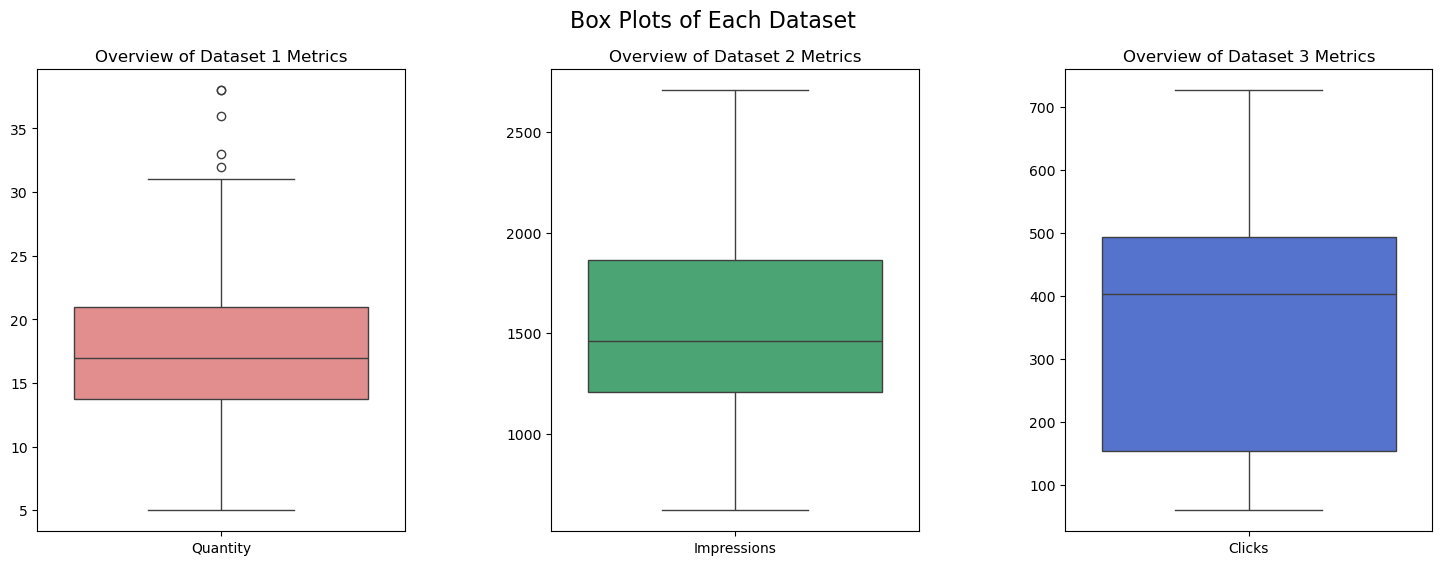

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'wspace': 0.4})

# Plot for Dataset 1
sns.boxplot(data=df1, ax=axes[0], color='lightcoral')
axes[0].set_title('Overview of Dataset 1 Metrics')

# Plot for Dataset 2
sns.boxplot(data=df2, ax=axes[1], color='mediumseagreen')
axes[1].set_title('Overview of Dataset 2 Metrics')

# Plot for Dataset 3
sns.boxplot(data=df3, ax=axes[2], color='royalblue')
axes[2].set_title('Overview of Dataset 3 Metrics')

plt.suptitle('Box Plots of Each Dataset', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 1])  
plt.show()



In [16]:
# Columns to check for outliers
columns_to_check = ['Quantity', 'Impressions', 'Clicks']

# Dictionary to store outlier information
outliers_info = {}

for column in columns_to_check:
    # Calculate Q1, Q3, and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_info[column] = {
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outliers_count": outliers.shape[0],
        "outliers": outliers[[column, 'Day Index']]  # Display day_index for reference
    }

# Display results
for column, info in outliers_info.items():
    print(f"\n{column.capitalize()} Outliers:")
    print(f"Lower bound: {info['lower_bound']}, Upper bound: {info['upper_bound']}")
    print(f"Number of outliers: {info['outliers_count']}")
    print(info['outliers'])


Quantity Outliers:
Lower bound: 2.875, Upper bound: 31.875
Number of outliers: 5
     Quantity   Day Index
4          33  05-12-2021
9          38  10-12-2021
78         38  17-02-2022
113        32  24-03-2022
142        36  22-04-2022

Impressions Outliers:
Lower bound: 231.375, Upper bound: 2840.375
Number of outliers: 0
Empty DataFrame
Columns: [Impressions, Day Index]
Index: []

Clicks Outliers:
Lower bound: -354.125, Upper bound: 1000.875
Number of outliers: 0
Empty DataFrame
Columns: [Clicks, Day Index]
Index: []


In [17]:
percentile_96_value = df["Quantity"].quantile(0.98)

print(percentile_96_value)

31.78


In [18]:
def impute_outliers_98th_percentile(series):
    q1, q3 = series.quantile([0.25, 0.75])
    IQR = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR
    percentile_96_value = series.quantile(0.98)
    return series.apply(lambda x: percentile_96_value if x < lower_bound or x > upper_bound else x)
df['New_Quantity'] = impute_outliers_98th_percentile(df['Quantity'])


In [19]:
print("Outliers in each dependent attribute:")
def column_to_check(data):
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1  
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

quantity_outliers = column_to_check(df['New_Quantity'])
outliers_count = len(quantity_outliers)
print(f"Quantity Outliers after imputation: {outliers_count}")

Outliers in each dependent attribute:
Quantity Outliers after imputation: 0


In [20]:
df

,Day Index,Quantity,Impressions,Clicks,New_Quantity
0,01-12-2021,14,620,445,14.00
1,02-12-2021,10,890,433,10.00
2,03-12-2021,13,851,424,13.00
3,04-12-2021,22,881,427,22.00
4,05-12-2021,33,678,451,31.78
...,...,...,...,...,...
207,26-06-2022,13,1218,114,13.00
208,27-06-2022,16,1311,106,16.00
209,28-06-2022,13,885,109,13.00
210,29-06-2022,16,1000,60,16.00


# Feature Engineering and EDA

In [22]:
import pandas as pd

df['Day Index'] = pd.to_datetime(df['Day Index'], format='%d-%m-%Y')


In [23]:
# Create weekends column, 1 if the day is a weekend (Saturday or Sunday) or else 0
df['weekends'] = df['Day Index'].dt.weekday >= 5

# Create columns for each day of the week (Mon, Tue, Wed, Thu, Fri, Sat, Sun)
df['mon'] = (df['Day Index'].dt.dayofweek == 0).astype(int)  
df['tue'] = (df['Day Index'].dt.dayofweek == 1).astype(int)  
df['wed'] = (df['Day Index'].dt.dayofweek == 2).astype(int)  
df['thur'] = (df['Day Index'].dt.dayofweek == 3).astype(int) 
df['fri'] = (df['Day Index'].dt.dayofweek == 4).astype(int)  
df['sat'] = (df['Day Index'].dt.dayofweek == 5).astype(int)  
df['sun'] = (df['Day Index'].dt.dayofweek == 6).astype(int)  

# Create columns for each month (Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec)
df['jan'] = (df['Day Index'].dt.month == 1).astype(int)
df['feb'] = (df['Day Index'].dt.month == 2).astype(int)
df['march'] = (df['Day Index'].dt.month == 3).astype(int)
df['april'] = (df['Day Index'].dt.month == 4).astype(int)
df['may'] = (df['Day Index'].dt.month == 5).astype(int)
df['june'] = (df['Day Index'].dt.month == 6).astype(int)
df['july'] = (df['Day Index'].dt.month == 7).astype(int)
df['august'] = (df['Day Index'].dt.month == 8).astype(int)
df['sep'] = (df['Day Index'].dt.month == 9).astype(int)
df['oct'] = (df['Day Index'].dt.month == 10).astype(int)
df['nov'] = (df['Day Index'].dt.month == 11).astype(int)
df['dec'] = (df['Day Index'].dt.month == 12).astype(int)


In [24]:
df

,Day Index,Quantity,Impressions,Clicks,New_Quantity,weekends,mon,tue,wed,thur,...,march,april,may,june,july,august,sep,oct,nov,dec
0,2021-12-01,14,620,445,14.00,False,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2021-12-02,10,890,433,10.00,False,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2021-12-03,13,851,424,13.00,False,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2021-12-04,22,881,427,22.00,True,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2021-12-05,33,678,451,31.78,True,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2022-06-26,13,1218,114,13.00,True,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
208,2022-06-27,16,1311,106,16.00,False,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
209,2022-06-28,13,885,109,13.00,False,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
210,2022-06-29,16,1000,60,16.00,False,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
import pandas as pd 

df['day'] = pd.to_datetime(df['Day Index']).dt.day_name()  # Add day column

# Group by day and aggregate
df_grouped = df.groupby('day').agg({
    'Quantity': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum',
    'New_Quantity': 'sum',
}).reset_index()

# Reorder days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_grouped['day'] = pd.Categorical(df_grouped['day'], categories=day_order, ordered=True)
df_grouped = df_grouped.sort_values('day').reset_index(drop=True)

# Print the DataFrame
print(df_grouped)


         day  Quantity  Impressions  Clicks  New_Quantity
0     Monday       565        48363   11102        565.00
1    Tuesday       493        46391   10480        493.00
2  Wednesday       510        44963   10693        510.00
3   Thursday       533        44240   11007        526.56
4     Friday       539        45957   10540        528.56
5   Saturday       543        47407   10779        543.00
6     Sunday       536        47400   11338        534.78


In [26]:
df['month'] = pd.to_datetime(df['Day Index']).dt.month_name()
# Filter for months from December to June
months_to_include = ['December', 'January', 'February', 'March', 'April', 'May', 'June']
df = df[df['month'].isin(months_to_include)]
# Group by month and aggregate
df_monthly = df.groupby('month').agg({
    'Quantity': 'sum',      
    'Impressions': 'sum',    
    'Clicks': 'sum',         
    'New_Quantity': 'sum',   
}).reset_index()

month_order = ['December', 'January', 'February', 'March', 'April', 'May', 'June']

# Reorder rows 
df_monthly['month'] = pd.Categorical(df_monthly['month'], categories=month_order, ordered=True)
df_monthly = df_monthly.sort_values('month').reset_index(drop=True)

print(df_monthly)


      month  Quantity  Impressions  Clicks  New_Quantity
0  December       495        35887   12284        487.56
1   January       533        47464   12314        533.00
2  February       554        42042   14372        547.78
3     March       620        50803   15419        619.78
4     April       599        52857   13480        594.78
5       May       471        47325    4566        471.00
6      June       447        48343    3504        447.00


# Plotting Graphs And Analysis

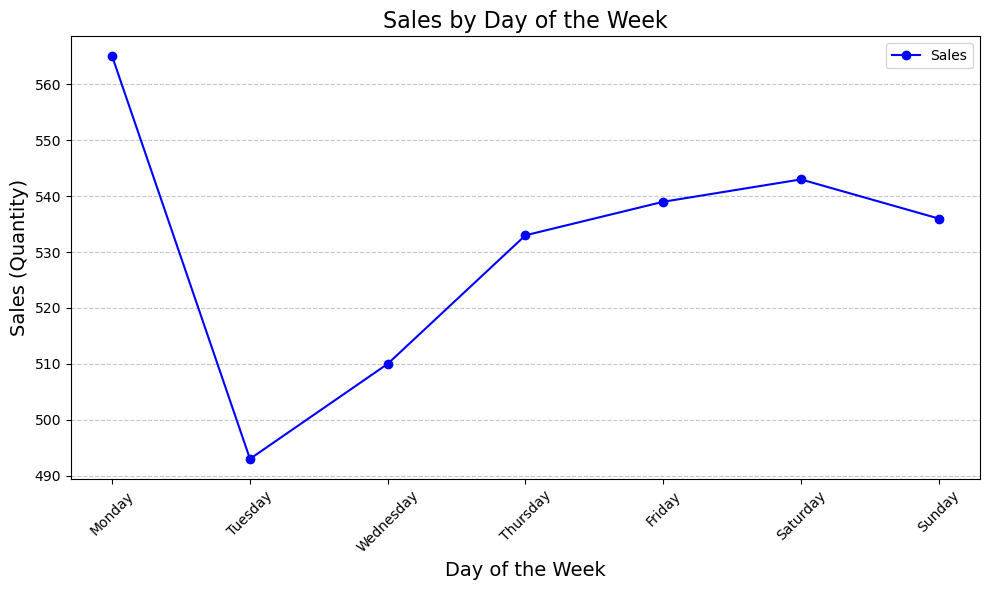

In [28]:
import matplotlib.pyplot as plt
# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['day'], df_grouped['Quantity'], marker='o', linestyle='-', color='b', label='Sales')
plt.title('Sales by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Sales (Quantity)', fontsize=14)
plt.xticks(rotation=45)  # Rotate day names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


###
Sales drop on Tuesday: There is a significant fall in the quantity of sales on Tuesday, the lowest throughout the week. This may be a signal of lower customer activity or interaction on Tuesdays due to lower demand or preference at the very start of the workweek.

Sales Recovery and Growth Midweek: Quantities sold are likely to start growing from Wednesday to Saturday. This growth might be some sort of mid-week recovery, where closer to the weekend, the pace of customers picks up.

Peak Sales on Friday and Saturday: The graph illustrates that the peak sales occur on Friday and Saturday. This can be explained by the sudden rush of consumer activity before the weekend, as people are more engaged in purchasing something or enjoying some form of leisure activity.

Sunday Slows Down: A minor decline is seen on Sundays in the quantities sold, which may indicate a typical weekend slowdown in anticipation of the coming week. This may signal less consumer activities occur on Sundays.

Overall, sales are higher during the weekend than during the week. The overall pattern is that sales for weekends-that include Fridays and Saturdays-are higher compared to other days. This can be explained by the increased spending due to free time during weekends.

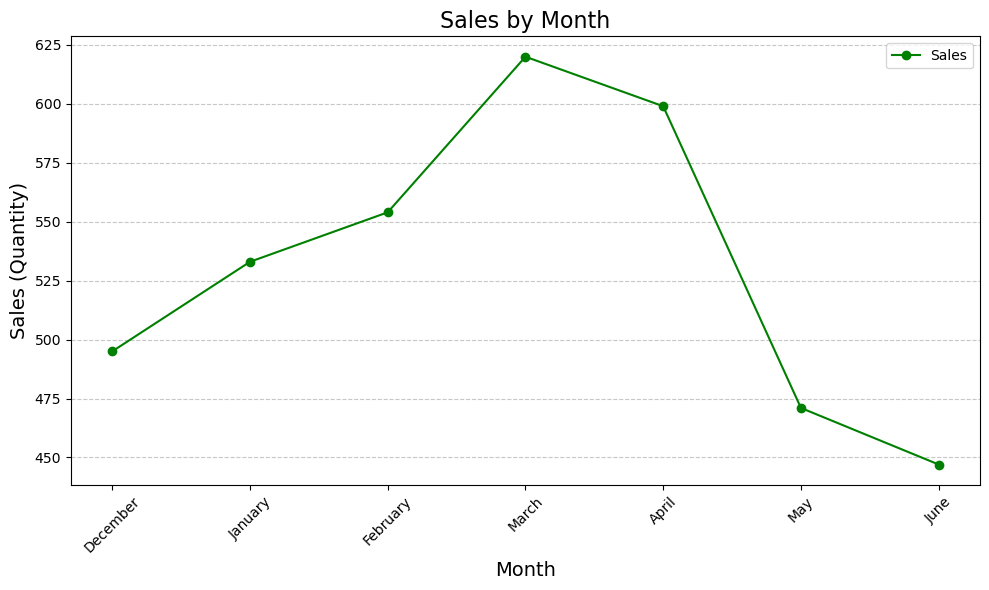

In [29]:
import matplotlib.pyplot as plt
# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(df_monthly['month'], df_monthly['Quantity'], marker='o', linestyle='-', color='g', label='Sales')
plt.title('Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales (Quantity)', fontsize=14)
plt.xticks(rotation=45)  # Rotate month names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


###
**Trend Analysis:** There appears to be a rise in sales from December to April, which peaks around April, from which sales drastically go down throughout May and June.
**Seasonal Pattern:** The increase in sales from December through April may depict seasonal demand, because of holidays or other factors.             
**Sudden Fall:** The drop from April to June is sharp; hence, this could be due to seasonal or market factors that caused a drop in demand, a change in consumer behavior, or probably some stock or supply issues.                                                                              
**Recommendation:** Companies, if this fall from April onwards is predictable, would prepare for those by adjusting their inventories or marketing strategy to lessen the impact of reduced sales during these months.


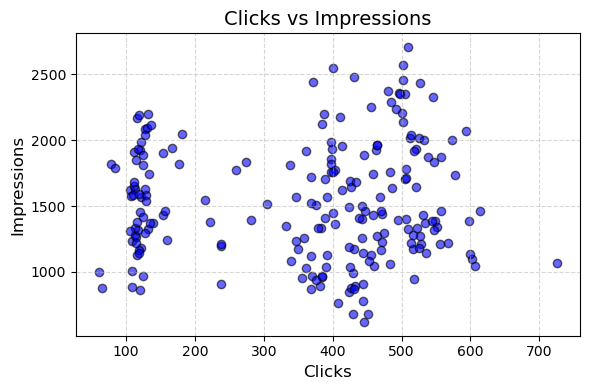

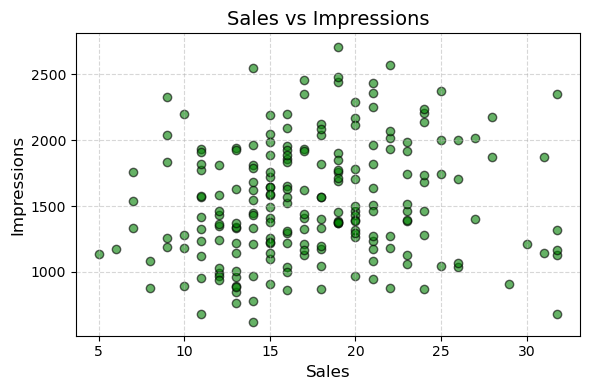

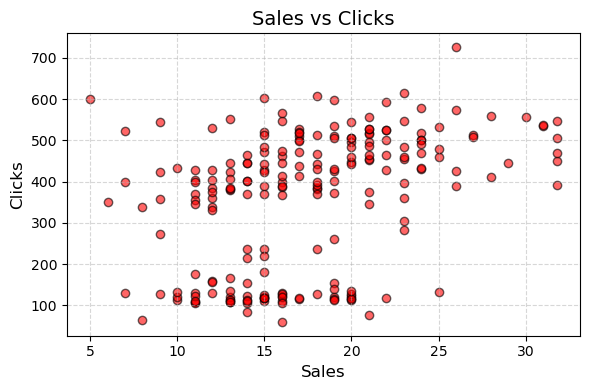

In [70]:
import matplotlib.pyplot as plt

# Scatter plot for Clicks vs Impressions
plt.figure(figsize=(6, 4))
plt.scatter(df['Clicks'], df['Impressions'], color='blue', alpha=0.6, edgecolor='k')
plt.title('Clicks vs Impressions', fontsize=14)
plt.xlabel('Clicks', fontsize=12)
plt.ylabel('Impressions', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Scatter plot for Impressions vs New_Quantity
plt.figure(figsize=(6, 4))
plt.scatter(df['New_Quantity'], df['Impressions'], color='green', alpha=0.6, edgecolor='k')
plt.title('Sales vs Impressions', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Impressions', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Scatter plot for New_Quantity vs Clicks
plt.figure(figsize=(6, 4))
plt.scatter(df['New_Quantity'], df['Clicks'], color='red', alpha=0.6, edgecolor='k')
plt.title('Sales vs Clicks', fontsize=14)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Clicks', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###
**Clicks vs Impressions**
The graph is scattered, and no line indicates a linear relationship between Clicks and Impressions. This means increased Impressions do not necessarily signify increased Clicks.The clicks range from about 50 to 700, while impressions range between 500 and 2500-that is a big spread.
The distribution here would hence indicate that there could be an opportunity to investigate specific data clusters with a view to understand what kind of content performs well in certain ranges, which may be useful for better targeting and content optimization.                                   
**Sales vs Impressions**
Generally speaking, the more impressions, the more sales.
This may suggest that the high marketing and visibility propel the sales upwards.
The scattered nature of the data points shows that other factors, other than impressions, are also quite crucial, like the quality of the product, its pricing, and marketing strategies.                                                                                                              
**Sales vs Clicks**
There is some form of positive correlation between Sales and Clicks. This is because an increased number of clicks calls for an increased propensity in the number of sales.
Most of the data points are scattered, showing that sales can be influenced not only by clicks but even by other factors.
Data points show clusters, which tend to suggest that most sales levels will revolve around certain ranges of clicks.


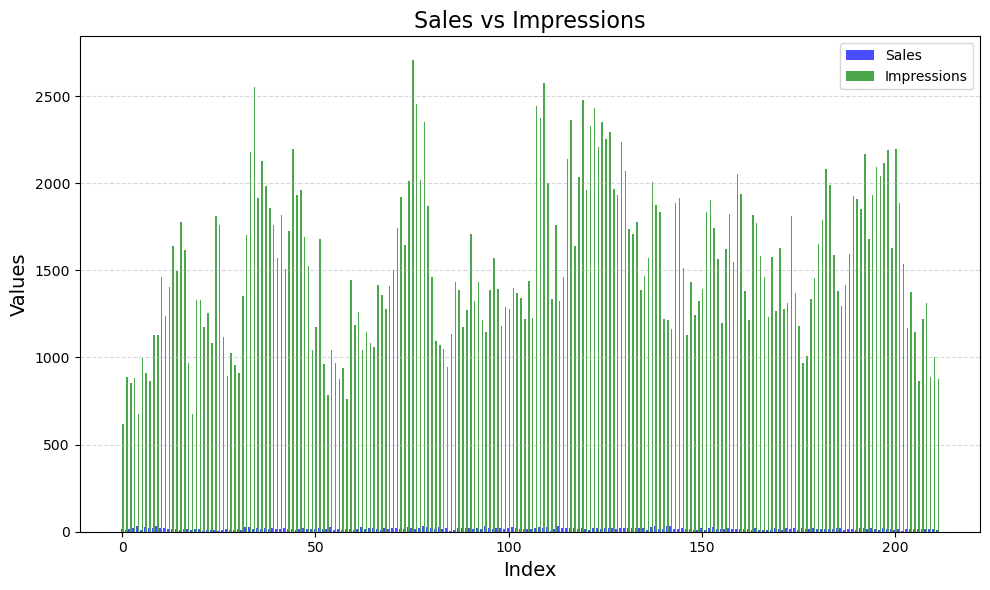

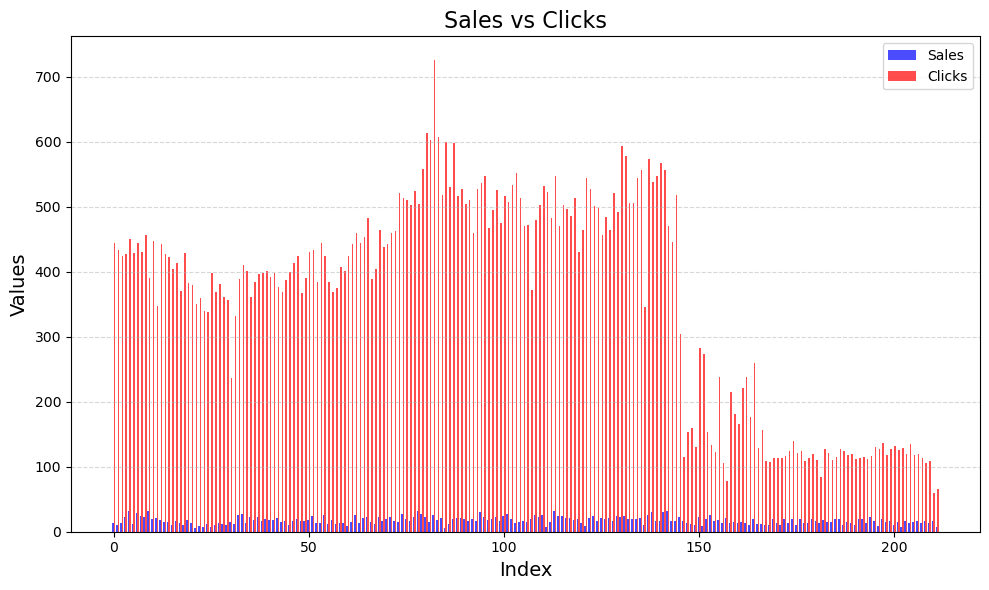

In [31]:
import matplotlib.pyplot as plt

# Bar graph for New_Quantity and Impressions
plt.figure(figsize=(10, 6))
plt.bar(df.index - 0.2, df['New_Quantity'], width=0.4, label='Sales', color='blue', alpha=0.7)
plt.bar(df.index + 0.2, df['Impressions'], width=0.4, label='Impressions', color='green', alpha=0.7)
plt.title('Sales vs Impressions', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Bar graph for New_Quantity and Clicks
plt.figure(figsize=(10, 6))
plt.bar(df.index - 0.2, df['New_Quantity'], width=0.4, label='Sales', color='blue', alpha=0.7)
plt.bar(df.index + 0.2, df['Clicks'], width=0.4, label='Clicks', color='red', alpha=0.7)
plt.title('Sales vs Clicks', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


###
**Sales vs Impressions**
There is a general trend where high impressions result in high sales, though it is not a linear relationship. The reason is that there are several points with a high level of impression that tend to have low sales, and vice versa. This is indicative of the fact that factors other than impression determine sales.Indeed, the chart points to the importance of impressions because these usually relate to increased sales. However, it should seriously be taken into consideration that the mere existence of impressions itself does not come out to be converted into sales.
There are other factors, too, such as product quality, pricing, marketing effectiveness, and customer sentiment, that have a major impact on sales, even with massive impression levels.                                                                                                   
**Sales vs Clicks**
The trend shows a consistent pattern where clicks are always higher than sales. This could indicate that while there is significant interest in the product or service, it is not converting into actual purchases.The peak value for clicks is significantly higher than that for sales. This peak could be due to a specific marketing campaign or event that drove a lot of traffic but did not result in a proportional increase in sales.The data suggests that while marketing efforts are successful in attracting clicks, they may not be as effective in converting those clicks into sales. This could be due to various factors such as the quality of the landing page, the pricing of the product, or the overall user experience.

# Correalational Matrix

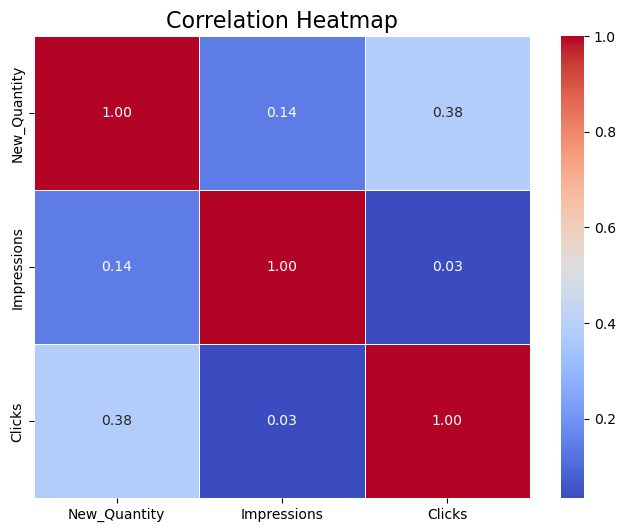

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['New_Quantity', 'Impressions', 'Clicks']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


###
The above plot is a correlation heat map, showing the correlation coefficients between the New_Quantity, Impressions, and Clicks. This plot uses color gradients from blue to red, with blue representing the lowest and red the highest for that correlation. Also, numerically, these correlations have been shown inside the cells of the plotting.

All the variables perfectly correlate with themselves, as depicted by having a correlation coefficient of 1.00 and most saturated red color.       

New_Quantity - Impressions: The New_Quantity and Impressions is related to the correlation coefficient value of 0.14. That can be inferred to mean that with more new quantity, the number of impressions tends to be on the higher side but very weakly.                                                

New_Quantity and Clicks: The correlation coefficient between New_Quntity and Clicks stands at 0.38, showing a moderately positive correlation. That infers that as the quantity of new items increases, the clicks have a fair increase.                                                        

Impressions vs. Clicks: The correlation coefficient between Impressions and Clicks is 0.03, showing a very weak positive correlation. This therefore implies that Impressions does not relate so much with Clicks.                                                                                 

Color Gradient: Color gradient in this graph should be used for the interpretation of the strength of the correlations. Darker red shows stronger correlations, while lighter blue shows weaker correlations.
